# Automating Crypto Website API 


In [5]:
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'50',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'eb9a3421-54b9-4ad5-a7cd-f9ea62161823',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-01-10T03:21:57.514Z', 'error_code': 0, 'error_message': None, 'elapsed': 15, 'credit_count': 1, 'notice': None, 'total_count': 10560}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11860, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [7]:
type(data)

dict

In [22]:
import pandas as pd 

# flattens nested JSON data into a flat table (DataFrame)
 
df=pd.json_normalize(data['data'])

# adds new column 'timestamp' to DataFrame with current date and time 

df['timestamp']=pd.to_datetime('now')

# change display options, ensure that all columns/rows of a dataframe to be displayed 

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11860,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.980805e+07,1.980805e+07,False,NaN,1,NaN,NaN,NaN,2025-01-10T03:20:00.000Z,93432.952414,6.107073e+10,-6.7954,0.388208,-1.079628,-3.502613,-4.078323,15.063001,49.404854,1.850724e+12,56.7898,1.962092e+12,NaN,2025-01-10T03:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 11:37:12.712598
1,1027,Ethereum,ETH,ethereum,9812,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204813e+08,1.204813e+08,True,NaN,2,NaN,NaN,NaN,2025-01-10T03:20:00.000Z,3247.756458,2.860487e+10,-16.2745,0.449846,-2.461922,-6.007290,-11.406097,1.842539,33.289252,3.912939e+11,12.0069,3.912939e+11,NaN,2025-01-10T03:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 11:37:12.712598
2,825,Tether USDt,USDT,tether,112100,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.374462e+11,1.414371e+11,True,NaN,3,NaN,NaN,NaN,2025-01-10T03:20:00.000Z,0.999852,1.206825e+11,-11.1542,-0.003378,0.028411,0.072426,-0.092719,-0.083223,0.003154,1.374258e+11,4.2173,1.414161e+11,NaN,2025-01-10T03:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-10 11:37:12.712598
3,52,XRP,XRP,xrp,1498,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.744905e+10,9.998671e+10,False,NaN,4,NaN,NaN,NaN,2025-01-10T03:20:00.000Z,2.281882,5.686698e+09,-30.5504,0.141667,-2.879920,-6.658816,-0.911425,284.459143,325.007188,1.310920e+11,4.0226,2.281882e+11,NaN,2025-01-10T03:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 11:37:12.712598
4,1839,BNB,BNB,bnb,2329,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440064e+08,1.440064e+08,False,NaN,5,NaN,NaN,NaN,2025-01-10T03:20:00.000Z,687.701046,1.931367e+09,-9.7604,0.213834,-1.387020,-2.133641,1.226549,8.226746,19.320984,9.903333e+10,3.0389,9.903333e+10,NaN,2025-01-10T03:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 11:37:12.712598
5,5426,Solana,SOL,solana,820,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.837468e+08,5.918694e+08,True,NaN,6,NaN,NaN,NaN,2025-01-10T03:20:00.000Z,188.396623,3.776490e+09,-18.8927,0.443404,-3.506187,-8.751492,-13.635991,-10.178832,29.823428,9.113626e+10,2.7965,1.115062e+11,NaN,2025-01-10T03:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 11:37:12.712598
6,74,Dogecoin,DOGE,dogecoin,1142,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.475598e+11,1.475598e+11,True,NaN,7,NaN,NaN,NaN,2025-01-10T03:20:00.000Z,0.326666,3.536796e+09,-16.6303,0.762449,-3.846425,-4.083555,-16.675808,13.198161,196.816198,4.820275e+10,1.4792,4.820275e+10,NaN,2025-01-10T03:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 11:37:12.712598
7,3408,USDC,USDC,usd-coin,24590,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.541699e+10,4.541699e+10,False,NaN,8,NaN,NaN,NaN,2025-01-10T03:20:00.000Z,1.000015,8.430763e+09,-11.5350,-0.002887,0.010131,0.000418,-0.007731,0.014333,0.001494,4.541767e+10,1.3937,4.541767e+10,NaN,2025-01-10T03:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-10 11:37:12.712598
8,2010,Cardano,ADA,cardano,1428,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.51582

In [64]:
import os
import json
import pandas as pd
from requests import Session 
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
from time import time
from time import sleep

# appending data to DataFrame
# creating an empty DataFrame globally 

df = pd.DataFrame()

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'eb9a3421-54b9-4ad5-a7cd-f9ea62161823',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
        # making API request
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
        # use response.json() instead of jason.loads(response.text) for a cleaner and straightforward method 
        # parse the JSON response into a python dictionary
        # data = response.json()
    
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    # normalize and create a DataFrame from the response data
    df2=pd.json_normalize(data['data']) 

    # add timestamp to df2
    df2['timestamp']=pd.to_datetime('now')

    # concatenate the new data (df2) with existing df
    df = pd.concat([df,df2], ignore_index=True)

    # print the first few rows of the DataFrame
    #print(df.head())

# run the API 100 times 
for i in range(100):
    api_runner()
    print('API Runner successfully completed')
    sleep(60) #sleep for 60 seconds
exit()

        

API Runner successfully completed
API Runner successfully completed
API Runner successfully completed
API Runner successfully completed
API Runner successfully completed


KeyboardInterrupt: 

In [66]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11860,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00,19808084.00,19808084.00,False,NaN,1,None,None,None,2025-01-10T05:22:00.000Z,93766.13,60651582732.87,-5.62,0.07,-0.56,-2.91,-3.85,15.41,49.81,1857327336773.57,56.87,1969088684813.99,None,2025-01-10T05:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 13:23:53.348500
1,1027,Ethereum,ETH,ethereum,9812,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120474184.90,120474184.90,True,NaN,2,None,None,None,2025-01-10T05:23:00.000Z,3246.85,28485450740.88,-11.93,-0.23,-2.68,-5.81,-11.40,2.79,32.91,391161992485.45,11.98,391161992485.45,None,2025-01-10T05:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 13:23:53.348500
2,825,Tether USDt,USDT,tether,112113,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,137446161140.61,141437091578.25,True,NaN,3,None,None,None,2025-01-10T05:23:00.000Z,1.00,119940206567.00,-9.17,0.02,0.07,0.11,-0.02,-0.06,0.06,137472096823.66,4.21,141463780338.04,None,2025-01-10T05:23:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-10 13:23:53.348500
3,52,XRP,XRP,xrp,1498,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00,57449049415.00,99986708632.00,False,NaN,4,None,None,None,2025-01-10T05:23:00.000Z,2.29,5531075253.40,-31.23,-0.18,-3.01,-5.97,-1.90,291.92,325.43,131371322126.47,4.02,228674492379.28,None,2025-01-10T05:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 13:23:53.348500
4,1839,BNB,BNB,bnb,2330,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144006370.25,144006370.25,False,NaN,5,None,None,None,2025-01-10T05:23:00.000Z,689.74,1919476269.57,-9.23,0.20,-1.37,-2.00,1.51,9.57,19.32,99327379192.41,3.04,99327379192.41,None,2025-01-10T05:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 13:23:53.348500
5,5426,Solana,SOL,solana,820,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,483745886.88,591868529.63,True,NaN,6,None,None,None,2025-01-10T05:23:00.000Z,188.80,3798831211.27,-11.62,-0.33,-3.30,-9.34,-13.45,-8.51,29.79,91332649325.21,2.80,111746522976.92,None,2025-01-10T05:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 13:23:53.348500
6,74,Dogecoin,DOGE,dogecoin,1142,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147561006383.71,147561006383.71,True,NaN,7,None,None,None,2025-01-10T05:23:00.000Z,0.33,3556795879.66,-12.17,-0.46,-3.71,-3.37,-16.34,13.88,196.81,48226160605.81,1.48,48226160605.81,None,2025-01-10T05:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 13:23:53.348500
7,3408,USDC,USDC,usd-coin,24595,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,45416185605.78,45416185605.78,False,NaN,8,None,None,None,2025-01-10T05:23:00.000Z,1.00,8406324870.11,-5.31,-0.00,0.01,0.01,0.01,0.01,0.02,45418376575.00,1.39,45418376575.00,None,2025-01-10T05:23:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-10 13:23:53.348500
8,2010,Cardano,ADA,cardano,1428,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00,35158211529.30,44995123125.80,False,NaN,9,None,None,None,2025-01-10T05:23:00.000Z,0.92,1247537953.20,-32.57,-0.29,-2.21,-9.28,-9.36,57.02,159.90,32266641

In [68]:
# numbers are now displayed with excatly 2 decimal places 

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11860,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00,19808084.00,19808084.00,False,NaN,1,None,None,None,2025-01-10T05:22:00.000Z,93766.13,60651582732.87,-5.62,0.07,-0.56,-2.91,-3.85,15.41,49.81,1857327336773.57,56.87,1969088684813.99,None,2025-01-10T05:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 13:23:53.348500
1,1027,Ethereum,ETH,ethereum,9812,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120474184.90,120474184.90,True,NaN,2,None,None,None,2025-01-10T05:23:00.000Z,3246.85,28485450740.88,-11.93,-0.23,-2.68,-5.81,-11.40,2.79,32.91,391161992485.45,11.98,391161992485.45,None,2025-01-10T05:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 13:23:53.348500
2,825,Tether USDt,USDT,tether,112113,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,137446161140.61,141437091578.25,True,NaN,3,None,None,None,2025-01-10T05:23:00.000Z,1.00,119940206567.00,-9.17,0.02,0.07,0.11,-0.02,-0.06,0.06,137472096823.66,4.21,141463780338.04,None,2025-01-10T05:23:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-10 13:23:53.348500
3,52,XRP,XRP,xrp,1498,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00,57449049415.00,99986708632.00,False,NaN,4,None,None,None,2025-01-10T05:23:00.000Z,2.29,5531075253.40,-31.23,-0.18,-3.01,-5.97,-1.90,291.92,325.43,131371322126.47,4.02,228674492379.28,None,2025-01-10T05:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 13:23:53.348500
4,1839,BNB,BNB,bnb,2330,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144006370.25,144006370.25,False,NaN,5,None,None,None,2025-01-10T05:23:00.000Z,689.74,1919476269.57,-9.23,0.20,-1.37,-2.00,1.51,9.57,19.32,99327379192.41,3.04,99327379192.41,None,2025-01-10T05:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 13:23:53.348500
5,5426,Solana,SOL,solana,820,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,483745886.88,591868529.63,True,NaN,6,None,None,None,2025-01-10T05:23:00.000Z,188.80,3798831211.27,-11.62,-0.33,-3.30,-9.34,-13.45,-8.51,29.79,91332649325.21,2.80,111746522976.92,None,2025-01-10T05:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 13:23:53.348500
6,74,Dogecoin,DOGE,dogecoin,1142,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147561006383.71,147561006383.71,True,NaN,7,None,None,None,2025-01-10T05:23:00.000Z,0.33,3556795879.66,-12.17,-0.46,-3.71,-3.37,-16.34,13.88,196.81,48226160605.81,1.48,48226160605.81,None,2025-01-10T05:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 13:23:53.348500
7,3408,USDC,USDC,usd-coin,24595,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,45416185605.78,45416185605.78,False,NaN,8,None,None,None,2025-01-10T05:23:00.000Z,1.00,8406324870.11,-5.31,-0.00,0.01,0.01,0.01,0.01,0.02,45418376575.00,1.39,45418376575.00,None,2025-01-10T05:23:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-10 13:23:53.348500
8,2010,Cardano,ADA,cardano,1428,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00,35158211529.30,44995123125.80,False,NaN,9,None,None,None,2025-01-10T05:23:00.000Z,0.92,1247537953.20,-32.57,-0.29,-2.21,-9.28,-9.36,57.02,159.90,32266641

In [72]:
# group the DataFrame by 'name' column and calculate the mean percentage change for respective time period 
# result: average percentage changes for each group 

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.09,-0.65,-2.95,-3.91,15.46,49.75
Ethereum,-0.23,-2.71,-5.83,-11.39,2.95,32.86
Tether USDt,0.01,0.06,0.08,-0.03,-0.08,0.04
XRP,-0.18,-3.03,-5.93,-1.88,292.37,325.34
BNB,0.19,-1.40,-2.02,1.48,9.68,19.29
Solana,-0.31,-3.32,-9.34,-13.47,-8.42,29.78
Dogecoin,-0.46,-3.75,-3.37,-16.37,13.97,196.73
USDC,-0.00,0.01,0.00,0.01,0.01,0.01
Cardano,-0.28,-2.27,-9.16,-9.38,57.38,159.88


In [82]:
# rename multiple columns
df4 = df3.rename(columns={'quote.USD.percent_change_1h':'1h','quote.USD.percent_change_24h':'24h','quote.USD.percent_change_7d':'7d','quote.USD.percent_change_30d':'30d','quote.USD.percent_change_60d':'60d','quote.USD.percent_change_90d':'90d'})
df4

,1h,24h,7d,30d,60d,90d
name,,,,,,
Bitcoin,0.09,-0.65,-2.95,-3.91,15.46,49.75
Ethereum,-0.23,-2.71,-5.83,-11.39,2.95,32.86
Tether USDt,0.01,0.06,0.08,-0.03,-0.08,0.04
XRP,-0.18,-3.03,-5.93,-1.88,292.37,325.34
BNB,0.19,-1.40,-2.02,1.48,9.68,19.29
Solana,-0.31,-3.32,-9.34,-13.47,-8.42,29.78
Dogecoin,-0.46,-3.75,-3.37,-16.37,13.97,196.73
USDC,-0.00,0.01,0.00,0.01,0.01,0.01
Cardano,-0.28,-2.27,-9.16,-9.38,57.38,159.88


In [106]:
# stack the Dataframe (convert columns to rows) while keeping the original row data 
df5 = df4.stack().reset_index()

# rename column for clarity 
df5.columns=['name','duration','percent_change']

df5

,name,duration,percent_change
0,Bitcoin,1h,0.09
1,Bitcoin,24h,-0.65
2,Bitcoin,7d,-2.95
3,Bitcoin,30d,-3.91
4,Bitcoin,60d,15.46
5,Bitcoin,90d,49.75
6,Ethereum,1h,-0.23
7,Ethereum,24h,-2.71
8,Ethereum,7d,-5.83
9,Ethereum,30d,-11.39


In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

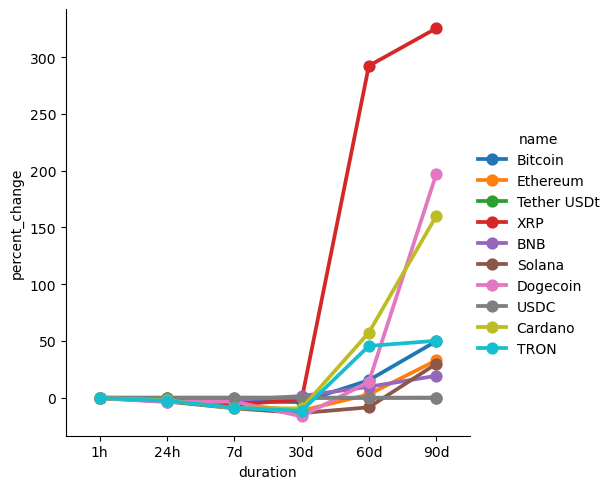

In [108]:
# create visualisation to display percentage change in multiple cryptocurrency price 

sns.catplot(x='duration', y='percent_change', hue='name', data=df5, kind='point')

In [126]:
# create visualisation to display single Crypto change in price 

df6 = df[['name','quote.USD.price','timestamp']]
df6 = df6.query("name == 'Bitcoin'")
df6

,name,quote.USD.price,timestamp
0,Bitcoin,93766.13,2025-01-10 13:23:53.348500
10,Bitcoin,93734.14,2025-01-10 13:24:54.096407
20,Bitcoin,93734.14,2025-01-10 13:25:54.441932
30,Bitcoin,93692.64,2025-01-10 13:26:54.814095
40,Bitcoin,93692.64,2025-01-10 13:27:55.140776


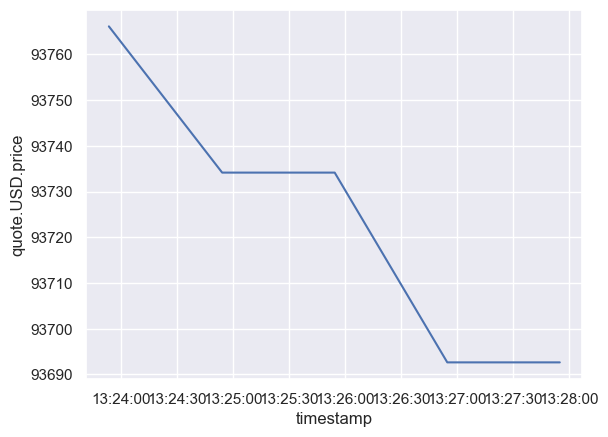

In [128]:
sns.lineplot(x='timestamp', y ='quote.USD.price', data=df6)
sns.set_theme(style='darkgrid')

In [56]:
import os
import json
import pandas as pd
from requests import Session 
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
from time import time
from time import sleep

# appending data to csv file
# creating an empty DataFrame globally 

df = pd.DataFrame()

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'eb9a3421-54b9-4ad5-a7cd-f9ea62161823',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
        # making API request
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
        # use response.json() instead of jason.loads(response.text) for a cleaner and straightforward method 
        # parse the JSON response into a python dictionary
        # data = response.json()
    
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
        
    df=pd.json_normalize(data['data']) 
    df['timestamp']=pd.to_datetime('now')
    df 

    # create csv and append data to it 
    
    if not os.path.isfile(r'C:\Users\User\Documents\Data Analysis Docs\Personal Project\Python API Pull\API_Pull.csv'):
        df.to_csv(r'C:\Users\User\Documents\Data Analysis Docs\Personal Project\Python API Pull\API_Pull.csv', header=True)
    else: 
        df.to_csv(r'C:\Users\User\Documents\Data Analysis Docs\Personal Project\Python API Pull\API_Pull.csv', mode='a', header=False )

# run the API 100 times 
for i in range(100):
    api_runner()
    print('API Runner successfully completed')
    sleep(60) #sleep for 60 seconds
exit()
    


API Runner successfully completed
API Runner successfully completed
API Runner successfully completed


KeyboardInterrupt: 

In [58]:
# read csv data in the file

df_csv = pd.read_csv(r'C:\Users\User\Documents\Data Analysis Docs\Personal Project\Python API Pull\API_Pull.csv')
df_csv


,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11860,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.980807e+07,1.980807e+07,False,NaN,1,NaN,NaN,NaN,2025-01-10T05:08:00.000Z,93849.542786,6.066445e+10,-5.8411,0.199814,-0.577862,-2.825800,-3.722117,15.123137,49.960952,1.858978e+12,56.8605,1.970840e+12,NaN,2025-01-10T05:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 13:10:27.142695
1,1,1027,Ethereum,ETH,ethereum,9812,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204742e+08,1.204742e+08,True,NaN,2,NaN,NaN,NaN,2025-01-10T05:09:00.000Z,3255.520599,2.853180e+10,-11.9834,0.042890,-2.472538,-5.655852,-11.188270,2.387268,33.129078,3.922062e+11,11.9931,3.922062e+11,NaN,2025-01-10T05:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 13:10:27.142695
2,2,825,Tether USDt,USDT,tether,112112,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,1.374462e+11,1.414371e+11,True,NaN,3,NaN,NaN,NaN,2025-01-10T05:08:00.000Z,0.999980,1.199885e+11,-9.4514,0.012665,0.045985,0.084616,-0.049601,-0.064140,0.027341,1.374435e+11,4.2040,1.414343e+11,NaN,2025-01-10T05:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-10 13:10:27.142695
3,3,52,XRP,XRP,xrp,1498,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.744905e+10,9.998671e+10,False,NaN,4,NaN,NaN,NaN,2025-01-10T05:08:00.000Z,2.291004,5.543287e+09,-31.4214,0.179993,-2.892552,-5.949246,-2.033200,287.981540,326.690078,1.316160e+11,4.0246,2.291004e+11,NaN,2025-01-10T05:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 13:10:27.142695
4,4,1839,BNB,BNB,bnb,2330,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.440064e+08,1.440064e+08,False,NaN,5,NaN,NaN,NaN,2025-01-10T05:08:00.000Z,689.892590,1.918348e+09,-9.5426,0.312295,-1.298715,-1.924807,1.372076,8.807437,19.352324,9.934893e+10,3.0380,9.934893e+10,NaN,2025-01-10T05:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 13:10:27.142695
5,5,5426,Solana,SOL,solana,820,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.837461e+08,5.918687e+08,True,NaN,6,NaN,NaN,NaN,2025-01-10T05:09:00.000Z,189.130125,3.791519e+09,-12.4307,-0.080451,-3.015441,-8.796257,-13.332951,-8.928362,30.097446,9.149096e+10,2.7977,1.119402e+11,NaN,2025-01-10T05:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 13:10:27.142695
6,6,74,Dogecoin,DOGE,dogecoin,1142,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.475606e+11,1.475606e+11,True,NaN,7,NaN,NaN,NaN,2025-01-10T05:09:00.000Z,0.327483,3.557456e+09,-12.5322,-0.038691,-3.579519,-3.061863,-16.073380,11.512390,197.834409,4.832366e+10,1.4778,4.832366e+10,NaN,2025-01-10T05:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 13:10:27.142695
7,7,3408,USDC,USDC,usd-coin,24595,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.541158e+10,4.541158e+10,False,NaN,8,NaN,NaN,NaN,2025-01-10T05:08:00.000Z,1.000028,8.405272e+09,-5.7493,0.009835,0.008713,-0.000137,0.003617,0.013707,0.008430,4.541285e+10,1.3887,4.541285e+10,NaN,2025-01-10T05:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-10 13:10:27.142695
8,8,2010,Cardano,ADA,cardano,1428,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smar